In [1]:
import sys
import os
if sys.platform == 'win32':
    os.environ["PATH"] += os.pathsep + r"C:\Users\Admin\AppData\Local\Microsoft\WinGet\Packages\Gyan.FFmpeg.Shared_Microsoft.Winget.Source_8wekyb3d8bbwe\ffmpeg-6.1.1-full_build-shared\bin"
    from torchaudio._extension.utils import _init_dll_path
    _init_dll_path()  # Đảm bảo load DLL từ PATH
import torchcodec
print(torchcodec.__version__)



0.8.0


In [2]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset, DownloadMode
from IPython.display import display, clear_output

# ===================================================================
# Phần code gốc của bạn (giữ nguyên)
# ===================================================================

# 1. Tên thư mục bạn muốn lưu dataset vào
save_directory = "american_sign_language_dataset"
os.makedirs(save_directory, exist_ok=True)
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
#ds = load_dataset("asthalochan/American_Sign_Language", download_mode=DownloadMode.FORCE_REDOWNLOAD)
ds = load_dataset("asthalochan/American_Sign_Language")



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# in ra số lượng video trong tập huấn luyện
print(f"Số lượng video trong tập huấn luyện: {len(ds['train'])}")
# in ra thông tin của một video mẫu
print(ds['train'][0])

Số lượng video trong tập huấn luyện: 3590
{'video': <torchcodec.decoders._video_decoder.VideoDecoder object at 0x000001F14E2540D0>, 'label': 0}


Video có dạng tensor với kích thước: torch.Size([50, 3, 480, 640])
Đang hiển thị các khung hình số: [ 0 12 24 36 49]


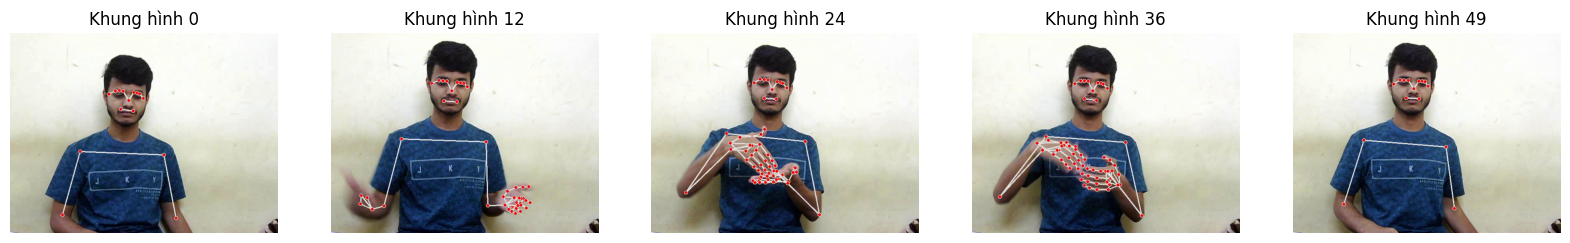

In [6]:
# convert video sang Video 
video_item = ds['train'][0]
video_object = video_item['video']

# --- BẮT ĐẦU PHẦN CODE MỚI ĐỂ HIỂN THỊ ---

# 3. Lấy dữ liệu video dưới dạng Tensor
# Dữ liệu video là một tensor có kích thước (Số khung hình, Cao, Rộng, Số kênh màu)
# Tiếng Anh: (Time, Height, Width, Channels) -> (T, H, W, C)
# SỬA LỖI Ở ĐÂY: Dùng [:] để lấy tất cả các khung hình từ VideoDecoder
video_object = video_item['video']

# 3. Lấy dữ liệu video dưới dạng Tensor
video_tensor = video_object[:]
print(f"Video có dạng tensor với kích thước: {video_tensor.shape}")

# 4. Chuyển Tensor sang NumPy array
video_np = video_tensor.numpy()

# 5. Chọn và hiển thị một vài khung hình
num_frames_to_show = 5
total_frames = len(video_np)
frame_indices = np.linspace(0, total_frames - 1, num_frames_to_show, dtype=int)
print(f"Đang hiển thị các khung hình số: {frame_indices}")

fig, axes = plt.subplots(1, num_frames_to_show, figsize=(20, 5))
if num_frames_to_show == 1:
    axes = [axes]

for i, frame_index in enumerate(frame_indices):
    # Lấy ra khung hình tại chỉ số frame_index (vẫn ở định dạng C, H, W)
    frame = video_np[frame_index]
    
    # --- SỬA LỖI Ở ĐÂY ---
    # Chuyển đổi thứ tự các trục từ (C, H, W) sang (H, W, C) để matplotlib hiển thị
    frame_for_display = frame.transpose(1, 2, 0)
    
    # Hiển thị khung hình đã được chuyển đổi
    axes[i].imshow(frame_for_display)
    axes[i].set_title(f"Khung hình {frame_index}")
    axes[i].axis('off')

plt.show()

In [9]:
# in ra số lượng frame trong video
print(f"Số lượng khung hình trong video mẫu: {total_frames}")
# In ra số lượng frame trong mỗi video bằng cách duyệt qua tập dữ liệu
frame_counts = [len(item['video']) for item in ds['train']]
print(f"Số lượng khung hình trong các video của tập huấn luyện: {frame_counts}")

Số lượng khung hình trong video mẫu: 50
Số lượng khung hình trong các video của tập huấn luyện: [50, 76, 69, 55, 53, 55, 55, 46, 58, 76, 58, 69, 63, 60, 57, 46, 52, 57, 54, 44, 44, 49, 43, 37, 45, 45, 40, 39, 48, 48, 49, 52, 52, 70, 64, 56, 72, 59, 38, 50, 55, 61, 52, 60, 59, 55, 56, 99, 65, 83, 44, 41, 44, 47, 43, 51, 46, 53, 52, 48, 42, 57, 61, 60, 51, 44, 49, 52, 50, 86, 63, 50, 41, 48, 49, 50, 40, 42, 43, 37, 50, 41, 45, 63, 70, 77, 74, 60, 61, 46, 46, 62, 76, 66, 64, 74, 76, 43, 62, 49, 60, 58, 60, 59, 61, 62, 51, 41, 51, 48, 60, 53, 57, 43, 55, 51, 47, 52, 49, 54, 53, 56, 53, 37, 57, 58, 57, 58, 57, 62, 70, 74, 64, 61, 63, 65, 69, 67, 62, 61, 73, 57, 55, 59, 65, 63, 61, 64, 74, 66, 59, 101, 102, 135, 81, 91, 103, 85, 53, 59, 46, 46, 58, 52, 52, 38, 55, 57, 39, 44, 39, 40, 52, 54, 50, 42, 43, 48, 50, 54, 56, 47, 39, 50, 48, 43, 58, 48, 44, 43, 47, 43, 66, 47, 64, 60, 59, 49, 51, 62, 57, 38, 41, 48, 61, 46, 59, 60, 43, 63, 52, 76, 66, 59, 53, 57, 49, 75, 64, 64, 55, 47, 49, 52, 57,

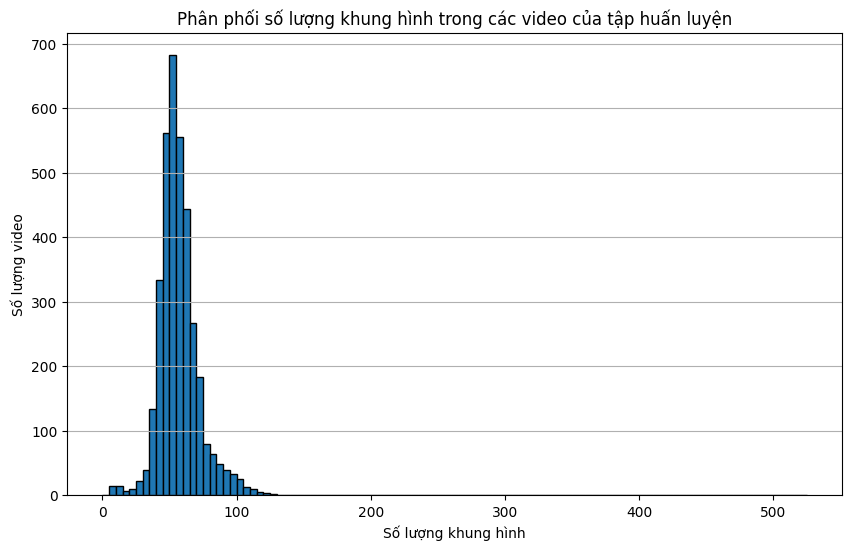

In [ ]:
# Vẽ biểu đồ phân phối số lượng frame trong các video với độ chia là 5
plt.figure(figsize=(10, 6))
plt.hist(frame_counts, bins=range(0, max(frame_counts) + 5, 5), edgecolor='black')
plt.title("Phân phối số lượng khung hình trong các video của tập huấn luyện")
plt.xlabel("Số lượng khung hình")
plt.ylabel("Số lượng video")
plt.grid(axis='y')
plt.show()

In [15]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

# --------------------------------------------------------------------------
# BƯỚC 1: GIẢ LẬP DỮ LIỆU VÀ PHÂN TÍCH ĐỘ DÀI (Tương tự script trước)
# --------------------------------------------------------------------------
print("--- BƯỚC 1: PHÂN TÍCH ĐỘ DÀI VIDEO ---")
# Tạo dữ liệu giả lập
np.random.seed(42)
main_distribution = np.random.normal(loc=60, scale=15, size=8000)
tail_distribution = np.random.randint(120, 500, size=200)
video_lengths = np.concatenate((main_distribution, tail_distribution))
video_lengths = video_lengths[video_lengths > 0].astype(int)
np.random.shuffle(video_lengths)

p95 = int(np.percentile(video_lengths, 95))
MAX_LENGTH = p95
print(f"Dựa trên phân tích, max_length được chọn là: {MAX_LENGTH}\n")


# --------------------------------------------------------------------------
# BƯỚC 2: TẠO DỮ LIỆU GIẢ LẬP VÀ PYTORCH DATASET
# --------------------------------------------------------------------------
print("--- BƯỚC 2: TẠO DỮ LIỆU VÀ DATASET ---")
FEATURE_DIM = 512  # Kích thước vector đặc trưng sau khi qua CNN
NUM_CLASSES = 100  # Số lượng lớp (từ/cụm từ)
NUM_SAMPLES = len(video_lengths)

# Tạo dữ liệu giả lập: một list các TENSOR
# Mỗi tensor đại diện cho một video đã được trích xuất đặc trưng
sequences = [torch.randn(length, FEATURE_DIM) for length in video_lengths]
# Tạo nhãn giả lập
labels = torch.randint(0, NUM_CLASSES, (NUM_SAMPLES,))

class SignLanguageDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return self.sequences[idx], self.labels[idx]

# --------------------------------------------------------------------------
# BƯỚC 3: VIẾT HÀM `collate_fn` ĐỂ PADDING/TRUNCATING
# --------------------------------------------------------------------------
# Đây là phần quan trọng nhất. Hàm này sẽ được DataLoader gọi để tạo ra
# một batch dữ liệu từ các sample riêng lẻ.
print("--- BƯỚC 3: ĐỊNH NGHĨA collate_fn ---")

def collate_fn_pad(batch):
    """
    Hàm này nhận vào một list các tuple (sequence, label) và thực hiện:
    1. Truncate các sequence dài hơn MAX_LENGTH.
    2. Ghi nhận lại độ dài thật của các sequence (sau khi truncate).
    3. Pad các sequence ngắn hơn để tất cả có cùng độ dài trong batch.
    4. Sắp xếp batch theo độ dài giảm dần (yêu cầu của pack_padded_sequence).
    5. Trả về batch đã được pad, danh sách độ dài, và nhãn tương ứng.
    """
    # Tách sequence và label
    sequences, labels = zip(*batch)

    # Truncate và lấy độ dài thật
    lengths = []
    truncated_seqs = []
    for seq in sequences:
        if len(seq) > MAX_LENGTH:
            seq = seq[:MAX_LENGTH]
        truncated_seqs.append(seq)
        lengths.append(len(seq))
    
    # Pad các sequences
    # `torch.nn.utils.rnn.pad_sequence` tự động pad các chuỗi trong list
    # để chúng có cùng độ dài với chuỗi dài nhất trong batch.
    padded_sequences = torch.nn.utils.rnn.pad_sequence(
        truncated_seqs, batch_first=True, padding_value=0.
    )

    # Chuyển labels và lengths thành tensor
    labels = torch.LongTensor(labels)
    lengths = torch.LongTensor(lengths)

    # Sắp xếp batch theo độ dài giảm dần (RẤT QUAN TRỌNG)
    lengths, sort_idx = lengths.sort(dim=0, descending=True)
    padded_sequences = padded_sequences[sort_idx]
    labels = labels[sort_idx]

    return padded_sequences, lengths, labels

# --------------------------------------------------------------------------
# BƯỚC 4: XÂY DỰNG MÔ HÌNH LSTM
# --------------------------------------------------------------------------
print("--- BƯỚC 4: XÂY DỰNG MÔ HÌNH LSTM ---")

class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=1,         # Có thể tăng số lớp
            batch_first=True      # Rất quan trọng khi input có shape (batch, seq, feature)
        )
        self.fc1 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim // 2, num_classes)

    def forward(self, x, lengths):
        # Đóng gói chuỗi trước khi đưa vào LSTM
        # Thao tác này báo cho LSTM biết độ dài thật của mỗi chuỗi trong batch
        # và bỏ qua các phần tử đệm (padding)
        packed_input = pack_padded_sequence(x, lengths, batch_first=True)

        # packed_output là một PackedSequence object
        # hidden là hidden state cuối cùng
        packed_output, (hidden, cell) = self.lstm(packed_input)
        
        # Chúng ta chỉ cần hidden state cuối cùng của layer cuối cùng để phân loại
        # hidden có shape (num_layers, batch, hidden_dim), ta lấy cái cuối cùng
        last_hidden_state = hidden[-1]

        # Đưa qua các lớp fully connected
        out = self.fc1(last_hidden_state)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# --------------------------------------------------------------------------
# BƯỚC 5: KHỞI TẠO VÀ HUẤN LUYỆN (VÍ DỤ)
# --------------------------------------------------------------------------
print("\n--- BƯỚC 5: KHỞI TẠO VÀ CHẠY THỬ MỘT BATCH ---")

# Khởi tạo Dataset và DataLoader
BATCH_SIZE = 32
dataset = SignLanguageDataset(sequences, labels)
data_loader = DataLoader(
    dataset=dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    collate_fn=collate_fn_pad  # Sử dụng hàm collate_fn tùy chỉnh
)

# Khởi tạo mô hình, hàm loss và optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Sử dụng thiết bị: {device}")

model = LSTMClassifier(
    input_dim=FEATURE_DIM,
    hidden_dim=256,
    num_classes=NUM_CLASSES
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Lấy một batch mẫu để kiểm tra
print("\nChạy thử một batch dữ liệu...")
padded_batch, lengths_batch, labels_batch = next(iter(data_loader))
padded_batch = padded_batch.to(device)
labels_batch = labels_batch.to(device)
# `lengths` phải ở trên CPU cho hàm pack_padded_sequence
# lengths_batch = lengths_batch.to(device) # Không cần dòng này

print(f"Kích thước batch đã pad: {padded_batch.shape}")
print(f"Độ dài thật trong batch: {lengths_batch.tolist()}")
print(f"Kích thước nhãn: {labels_batch.shape}")

# Huấn luyện trên một batch mẫu
model.train()
optimizer.zero_grad()
outputs = model(padded_batch, lengths_batch)
loss = criterion(outputs, labels_batch)
loss.backward()
optimizer.step()

print(f"\nChạy thành công một bước huấn luyện. Loss: {loss.item():.4f}")
print("Mô hình đã sẵn sàng để huấn luyện trên toàn bộ dữ liệu.")


# ### Giải thích các điểm chính trong PyTorch

# 1.  **`Dataset` và `DataLoader`:** Đây là cách chuẩn để xử lý dữ liệu. `Dataset` định nghĩa cách lấy một mẫu dữ liệu, và `DataLoader` chịu trách nhiệm tạo các batch, xáo trộn dữ liệu và tải song song.
# 2.  **`collate_fn`:** Đây là "linh hồn" của việc xử lý chuỗi có độ dài thay đổi. Thay vì padding toàn bộ dataset về cùng một `MAX_LENGTH`, `collate_fn` cho phép bạn chỉ padding các chuỗi trong *cùng một batch* về độ dài của chuỗi dài nhất *trong batch đó*. Điều này hiệu quả hơn rất nhiều. Trong ví dụ trên, tôi vẫn kết hợp cả việc cắt theo `MAX_LENGTH` toàn cục để xử lý các chuỗi ngoại lệ.
# 3.  **Sắp xếp theo độ dài:** `pack_padded_sequence` yêu cầu các chuỗi trong batch phải được sắp xếp theo độ dài giảm dần. `collate_fn` của chúng ta đã xử lý việc này.
# 4.  **`pack_padded_sequence`:** Hàm này nén một tensor đã được pad thành đối tượng `PackedSequence`. Đối tượng này không chứa các giá trị 0 ở cuối và có thông tin về độ dài gốc. Khi đưa vào lớp RNN (LSTM/GRU), PyTorch sẽ tự động tính toán mà không để ý đến các phần tử đệm, tương tự như lớp `Masking` của Keras.
# 5.  **`batch_first=True`:** Đây là một tham số rất hữu ích trong các lớp RNN của PyTorch, cho phép tensor đầu vào có shape `(batch, seq_length, features)` thay vì `(seq_length, batch, features)`, giúp code dễ đọc hơn.
# 6.  **Lấy Hidden State cuối:** Đối với bài toán phân loại chuỗi, chúng ta thường chỉ quan tâm đến output hoặc hidden state ở bước thời gian cuối cùng. `hidden[-1]` giúp lấy ra hidden state của lớp LSTM cuối cùng để đưa vào lớp phân loại.

--- BƯỚC 1: PHÂN TÍCH ĐỘ DÀI VIDEO ---
Dựa trên phân tích, max_length được chọn là: 89

--- BƯỚC 2: TẠO DỮ LIỆU VÀ DATASET ---
--- BƯỚC 3: ĐỊNH NGHĨA collate_fn ---
--- BƯỚC 4: XÂY DỰNG MÔ HÌNH LSTM ---

--- BƯỚC 5: KHỞI TẠO VÀ CHẠY THỬ MỘT BATCH ---
Sử dụng thiết bị: cpu

Chạy thử một batch dữ liệu...
Kích thước batch đã pad: torch.Size([32, 89, 512])
Độ dài thật trong batch: [89, 89, 89, 83, 82, 81, 79, 78, 77, 76, 75, 74, 72, 70, 66, 61, 61, 60, 58, 57, 56, 54, 53, 52, 45, 45, 44, 42, 41, 40, 38, 24]
Kích thước nhãn: torch.Size([32])

Chạy thành công một bước huấn luyện. Loss: 4.6204
Mô hình đã sẵn sàng để huấn luyện trên toàn bộ dữ liệu.
